## 1. Setup

In [1]:
# Better error messages in notebooks
%load_ext autoreload
%autoreload 2

In [2]:
# Set up and data paths

import sys
from pathlib import Path

# Get to project root from notebook location
PROJECT_ROOT = Path.cwd().parent
DATA_ROOT = Path("/mnt/h/SARFish/Generated/SLC")
# Add "src" to Python's module search path sys.path
sys.path.append(str(PROJECT_ROOT / "src"))

# Define Data path
DATA_DIR = DATA_ROOT / "train"

print(f"PROJECT_ROOT: {PROJECT_ROOT}")
print(f"DATA_ROOT: {DATA_ROOT}")
print(f"DATA_DIR: {DATA_DIR}")

PROJECT_ROOT: /home/peterm/UWA/CITS5014/SARFish/modelling
DATA_ROOT: /mnt/h/SARFish/Generated/SLC
DATA_DIR: /mnt/h/SARFish/Generated/SLC/train


## 2. Create Augmentations

In [10]:
from sar_slc_augmentation import SARSLCPreprocessingAugmentation

# Create augmentor with custom settings
augmentor = SARSLCPreprocessingAugmentation(
    geometric_probs={
        0: {'hflip': 0.2, 'vflip': 0.2, 'rotate': 0.2, 'translate': 0.2},
        1: {'hflip': 0.8, 'vflip': 0.8, 'rotate': 0.8, 'translate': 0.8}
    },
    sar_probs={
        0: {'intensity': 0.0, 'phase': 0.0, 'speckle': 0.0, 'gaussian_filter': 0.0},
        1: {'intensity': 0.0, 'phase': 0.0, 'speckle': 0.0, 'gaussian_filter': 0.0}
    },
    mosaic_prob={0: 0.03, 1: 1.0},  # Only mosaic for minority class
    min_visibility=0.3,  # proportion of BBox that must remain visible after augmentation for retention.
)

# Process training data
augmentor.process_directory(
    input_dir=str(DATA_DIR / 'crops_raw_96s' / 'images'), # raw input crops
    output_dir=str(DATA_DIR / 'crops_raw_96s_aug' / 'images_hvrt_msc_bal'), 
    labels_dir=str(DATA_DIR / 'crops_raw_96s' / 'labels'),
    output_labels_dir=str(DATA_DIR / 'crops_raw_96s_aug' / 'labels_hvrt_msc_bal'),
    augmentations_per_image={0: 1, 1: 5}  # extra augmentations for minority 
)

Scanning labels for file categorization...


Scanning: 100%|█████████████████████████████████████████████████████████████████████| 3071/3071 [01:46<00:00, 28.80it/s]



File categorization:
Files with class 0 (is_vessel): 2317
Files with class 1 (is_fishing): 757
Files with no labels: 0

Processing augmentations...


Augmenting: 100%|███████████████████████████████████████████████████████████████████| 3071/3071 [35:15<00:00,  1.45it/s]



Creating mosaic augmentations...
Creating 50 mosaics for minority class
Creating 20 mosaics for majority class
Created 70 total mosaics

Augmentation Summary:
Original SLC data files: 3071
Augmented SLC data files created: 5177
Augmented files with empty labels: 0
Total SLC data files after augmentation: 8248

Class Distribution Analysis:
Original data:
  Class 0 (is_vessel) only: 2314
  Class 1 (is_fishing) only: 754
  Both classes: 3
  No labels: 0

Augmented data:
  Class 0 (is_vessel) only: 1399
  Class 1 (is_fishing) only: 3769
  Both classes: 79
  No labels: 0

Total class occurrences:
Original - Class 0: 2317, Class 1: 757 (Ratio 3.06:1)
After augmentation - Class 0: 3795, Class 1: 4605 (Ratio 0.82:1)


## 3. View Augmentations

### 3.1 Raw image crops (NumPy float32)

#### 3.1.1 Individual image crops

Five randomly selected individual raw image crop pairs comparing original crop (top) with one of its augmented variants (bottom).

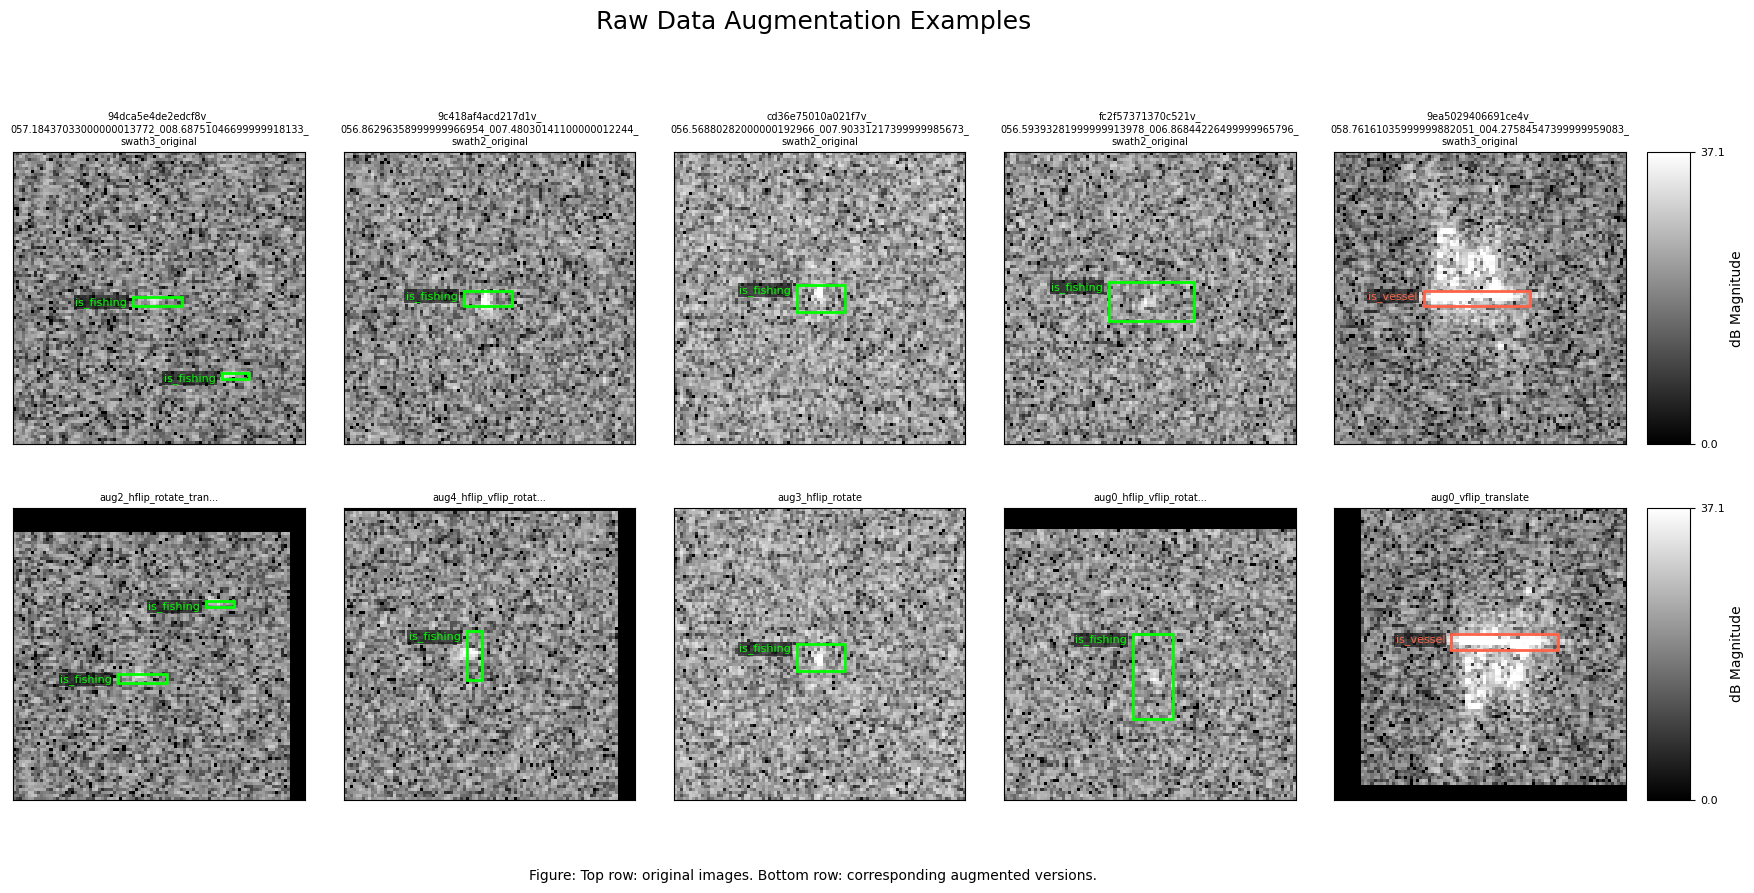

In [27]:
from view_augmentations import view_augmentations
view_augmentations(
    base_dir=str(DATA_DIR / 'crops_raw_96s_aug'),
    img_subdir='images_hvrt_msc_bal',
    lbl_subdir='labels_hvrt_msc_bal',
    max_images=10,
    #amp_clip_min=18.60,  # 75th percentile
    amp_clip_max=71.51,  # 99th percentile
    class_filter=None,   # filter not applicable for mosaics
    save_path=None,
    select_mosaics=False
)

#### 3.1.2 Raw mosaics

Ten randomly selected raw mosaics.

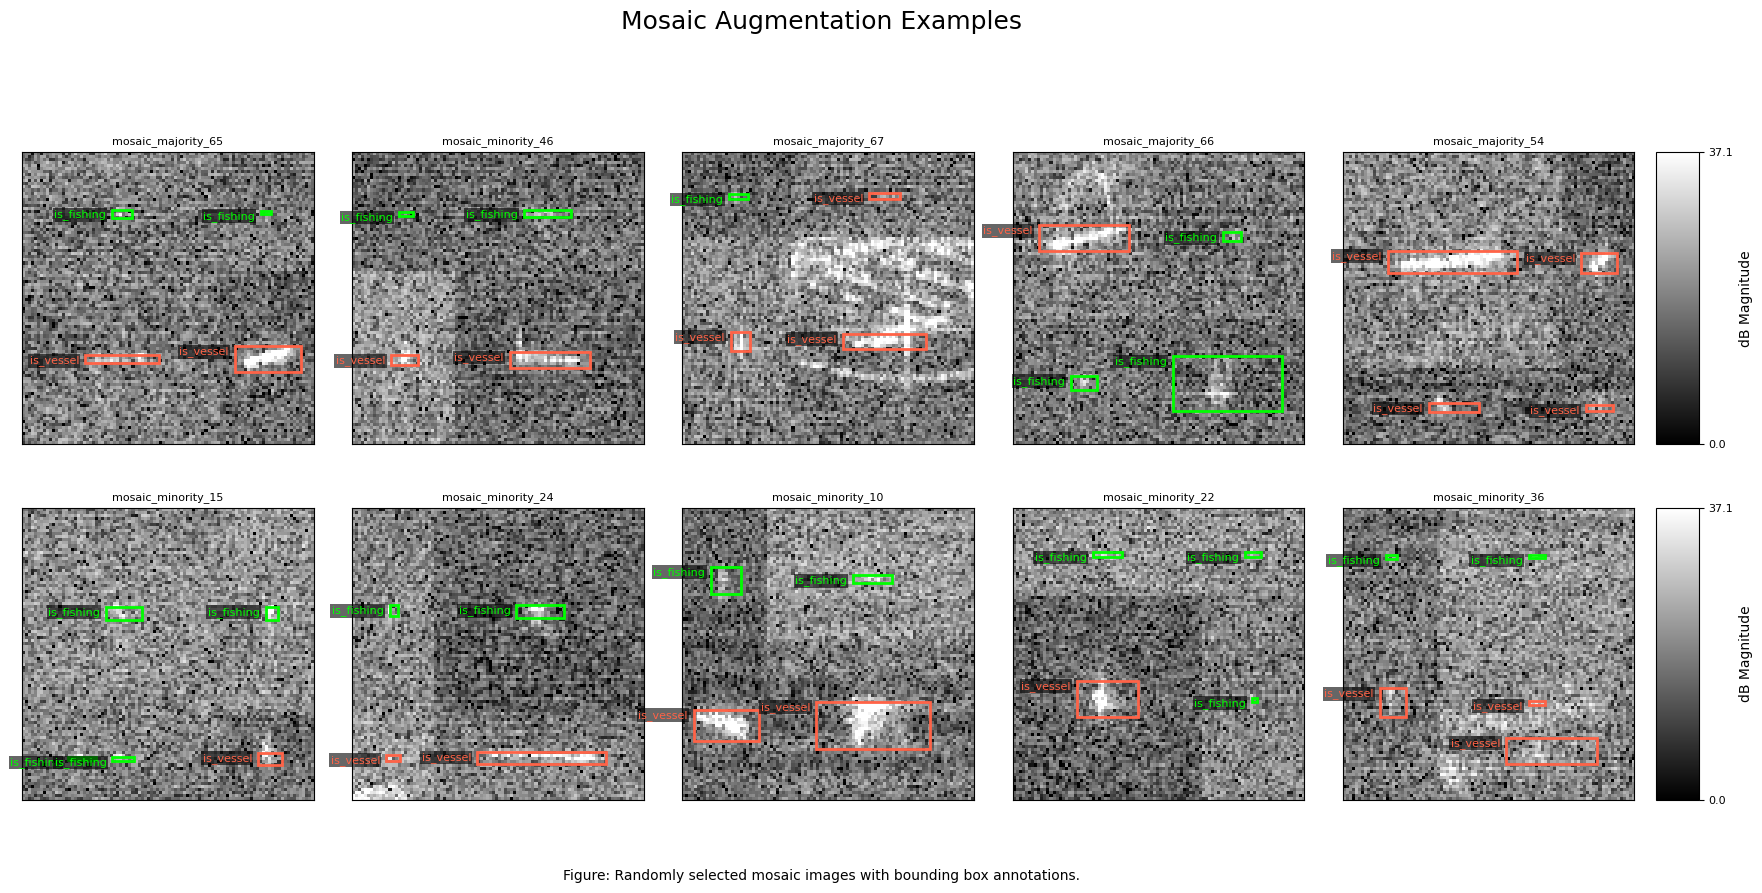

In [29]:
from view_augmentations import view_augmentations
view_augmentations(
    base_dir=str(DATA_DIR / 'crops_raw_96s_aug'),
    img_subdir='images_hvrt_msc_bal',
    lbl_subdir='labels_hvrt_msc_bal',
    max_images=10,
    #amp_clip_min=18.60,  # 75th percentile
    amp_clip_max=71.51,  # 99th percentile
    class_filter=None,   # filter not applicable for mosaics
    save_path=None,
    select_mosaics=True
)

### 3.2 Processed image crops (PNG uint8)

#### 3.2.1 Individual image crops

As per Section 3.1.1 but using processed augmented image crops.

Found 5177 augmented pairs


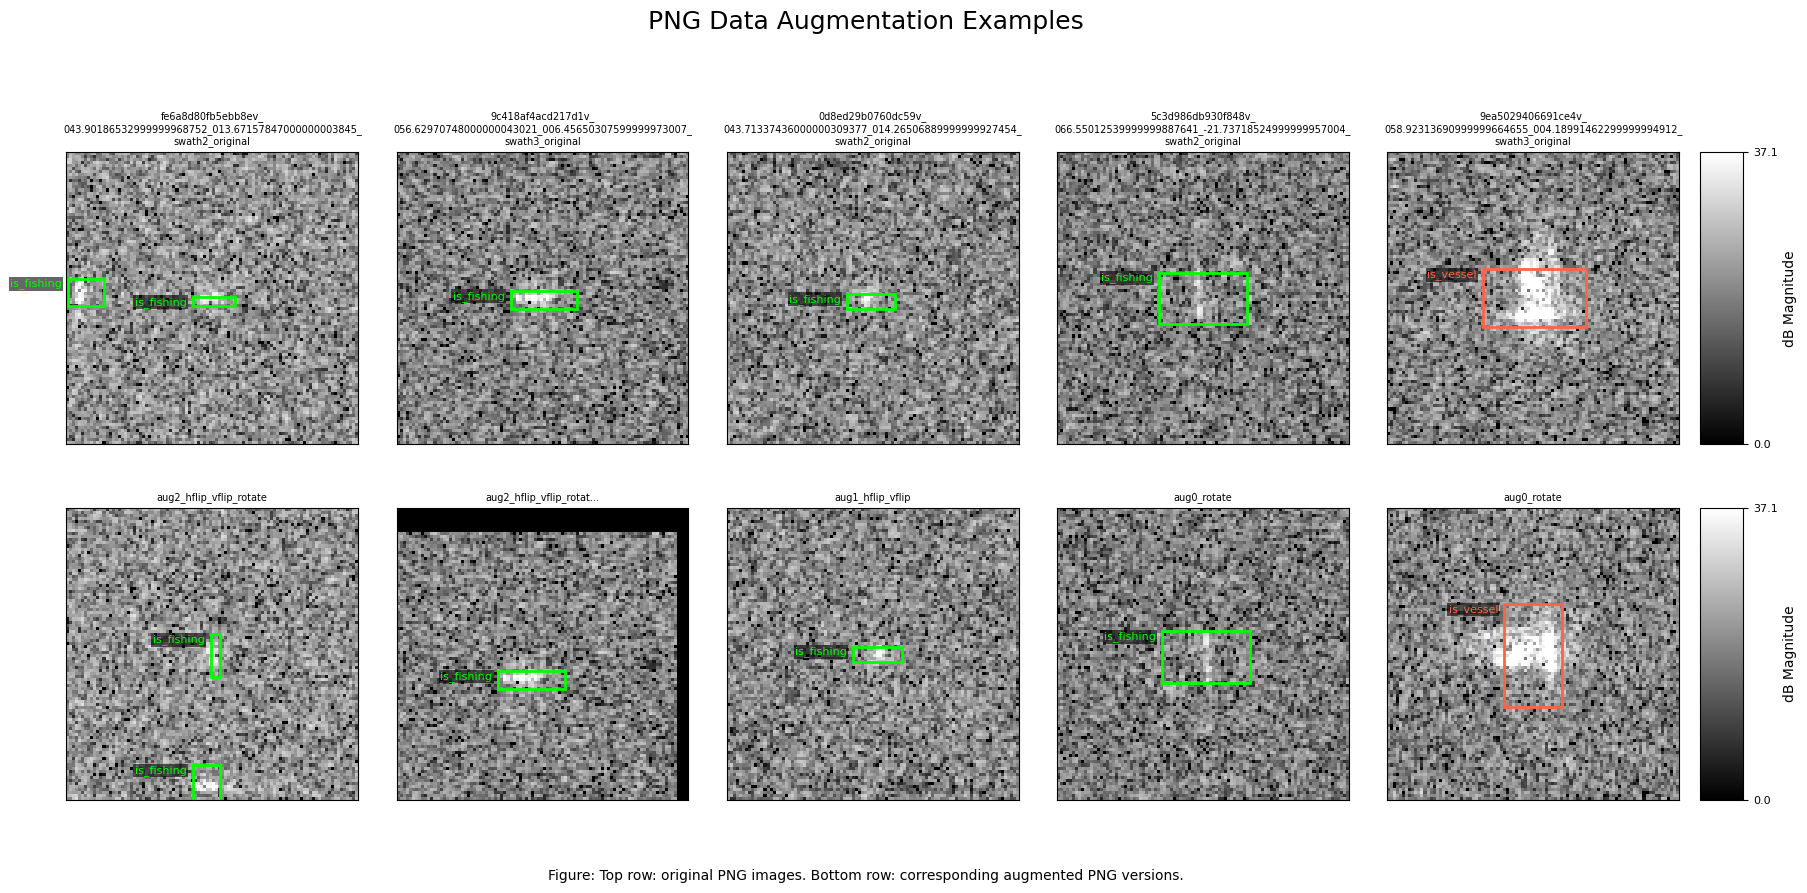

In [70]:
from view_png_augmentations import view_png_augmentations
view_png_augmentations(
    base_dir=str(DATA_DIR / 'crops_png_96s_aug'),
    img_subdir='images_hvrt_msc_bal',
    lbl_subdir='labels_hvrt_msc_bal',
    max_images=10,
    #amp_clip_min=18.60, # 75th percentile
    amp_clip_max=71.51,  # 99th percentile (default)
    class_filter=None,   # filter not applicable for mosaics
    save_path=None,
    select_mosaics=False
)

#### 3.2.1 PNG mosaics

Ten randomly selected PNG mosaics.

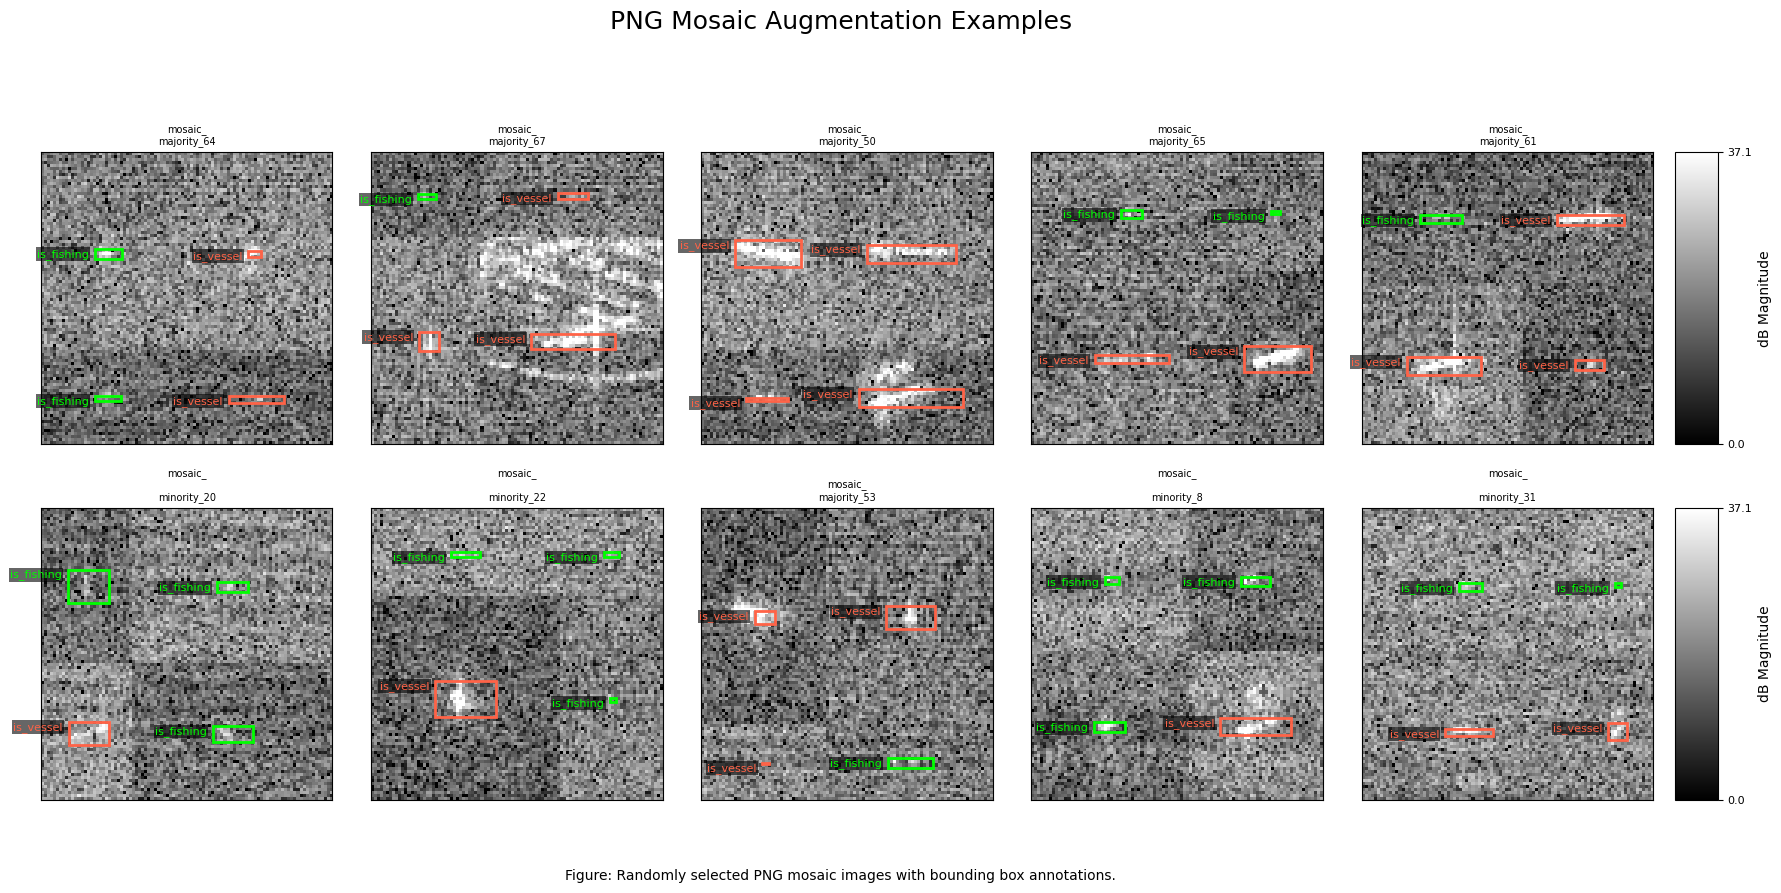

In [71]:
from view_png_augmentations import view_png_augmentations
view_png_augmentations(
    base_dir=str(DATA_DIR / 'crops_png_96s_aug'),
    img_subdir='images_hvrt_msc_bal',
    lbl_subdir='labels_hvrt_msc_bal',
    max_images=10,
    #amp_clip_min=18.60,  # 75th percentile
    amp_clip_max=71.51,  # 99th percentile
    class_filter=None,   # filter not applicable for mosaics
    save_path=None,
    select_mosaics=True
)